<a href="https://colab.research.google.com/github/Akhil-2001/Low-Light-Image-Enhancement-Techniques/blob/main/LLIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install image-dehazer

     |████████████████████████████████| 14.6 MB 4.8 MB/s 
  Created wheel for image-dehazer: filename=image_dehazer-0.0.5-py3-none-any.whl size=5338 sha256=73bb5d79431209c4cd7044f103b4f06fedf333f4e36645502467ebd35b350e61
  Stored in directory: /root/.cache/pip/wheels/1f/df/91/5f397926c032bd3a2f67bf771bfa1c555e67fe8877814c926e
Successfully built image-dehazer
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.

In [ ]:
import cv2
import numpy as np
import image_dehazer

In [ ]:
directory='/content/drive/MyDrive/MiniProject/Images/'
image1=cv2.imread(directory+'8.bmp')
image2=cv2.imread(directory+'2.jpg')
image1=cv2.resize(image1, (600, 400))
image2=cv2.resize(image2, (600, 400))

In [ ]:
from google.colab.patches import cv2_imshow

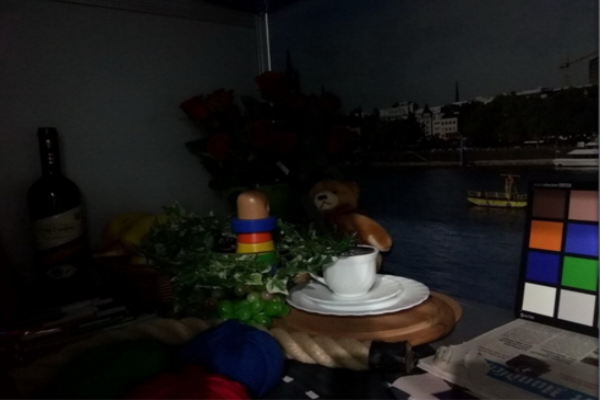

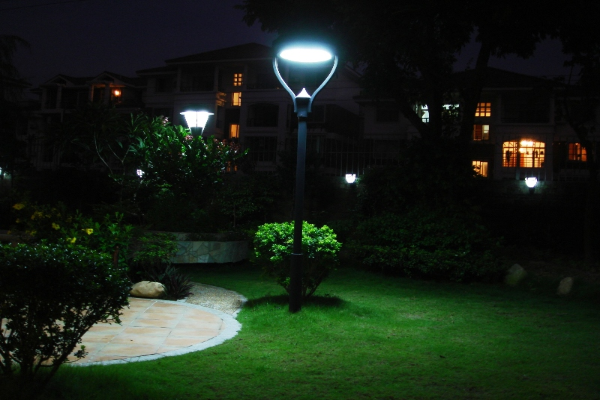

In [ ]:
cv2_imshow(image1)
print("\n")
cv2_imshow(image2)

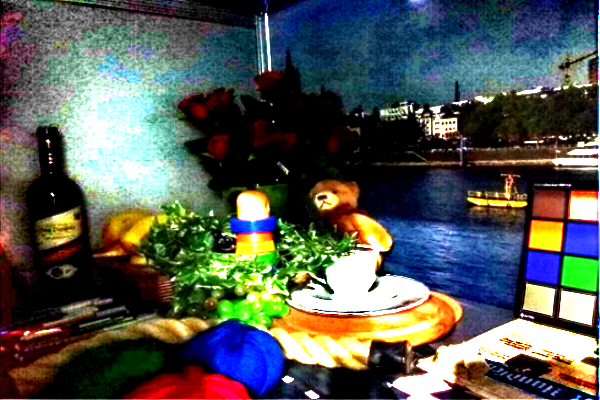

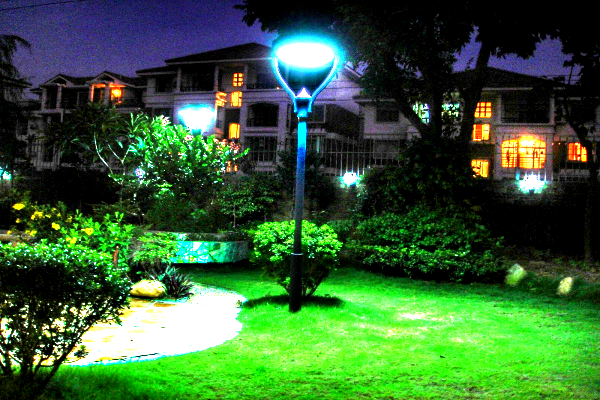

Image 1 :  9.033188148754943
Image 2 :  11.545848883649551


In [ ]:
#inverting and dehazing 
imageinv1=cv2.bitwise_not(image1)
dehazed1=image_dehazer.remove_haze(imageinv1)
dehazedinv1=cv2.bitwise_not(dehazed1)
dehazedfinal1=image_dehazer.remove_haze(dehazedinv1)
cv2_imshow(dehazedfinal1)
print("\n")
#inverting and dehazing 
imageinv2=cv2.bitwise_not(image2)
dehazed2=image_dehazer.remove_haze(imageinv2)
dehazedinv2=cv2.bitwise_not(dehazed2)
dehazedfinal2=image_dehazer.remove_haze(dehazedinv2)
cv2_imshow(dehazedfinal2)
psnr1=cv2.PSNR(image1, dehazedfinal1)
psnr2=cv2.PSNR(image2, dehazedfinal2)
print("Image 1 : ",psnr1)
print("Image 2 : ",psnr2)

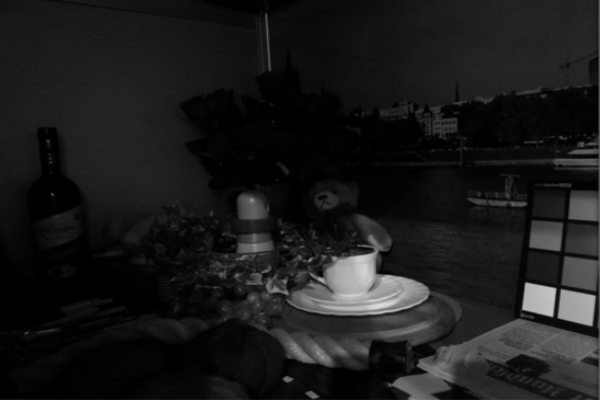

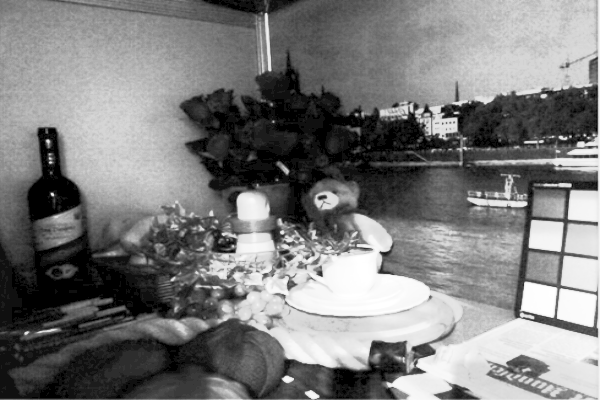

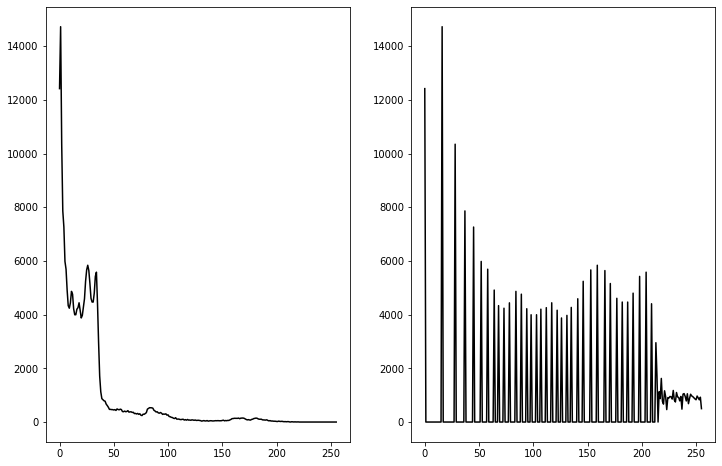

Image 1 :  7.157188792811244


In [ ]:
#histogram equalization
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
histogram1=cv2.calcHist([gray_image1], [0], None, [256], [0, 256])
ax1.plot(histogram1, color='k')
cv2_imshow(gray_image1)
heImg1=cv2.equalizeHist(gray_image1)
equalizedhist1=cv2.calcHist([heImg1], [0], None, [256], [0, 256])
ax2.plot()
ax2.plot(equalizedhist1, color='k')
cv2_imshow(heImg1)
plt.show()
psnr1=cv2.PSNR(gray_image1, heImg1)
print("Image 1 : ",psnr1)

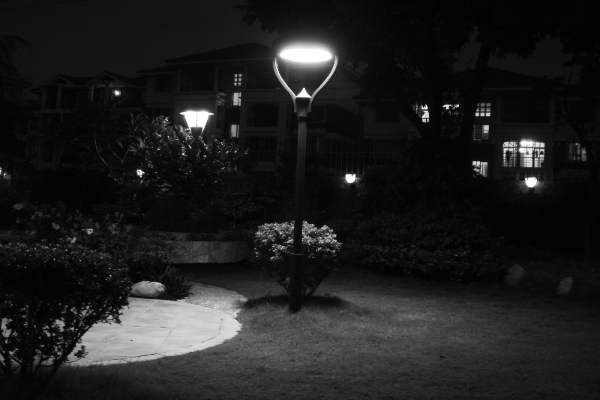

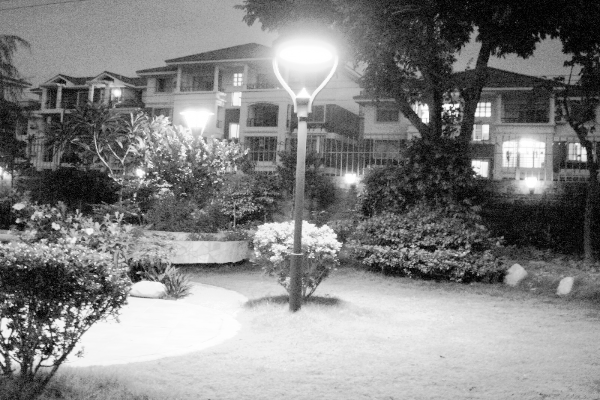

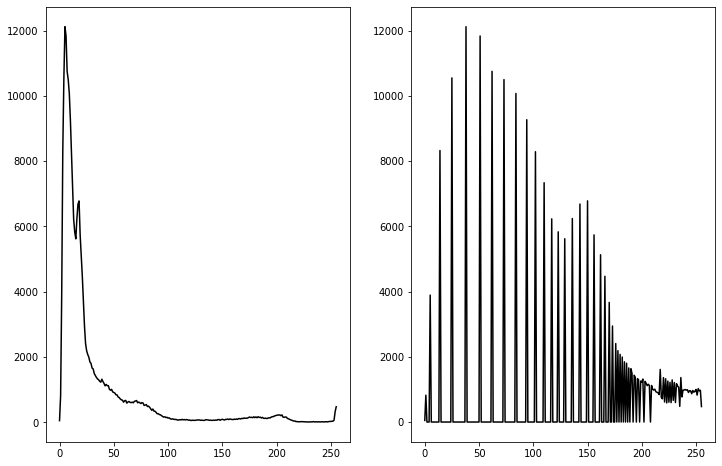

Image 2 :  7.105861097457055


In [ ]:
#histogram equalization
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
gray_image2=cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
histogram2=cv2.calcHist([gray_image2], [0], None, [256], [0, 256])
ax1.plot(histogram2, color='k')
cv2_imshow(gray_image2)
heImg2=cv2.equalizeHist(gray_image2)
equalizedhist2 = cv2.calcHist([heImg2], [0], None, [256], [0, 256])
ax2.plot(equalizedhist2, color='k')
cv2_imshow(heImg2)
plt.show()
psnr2=cv2.PSNR(gray_image2, heImg2)
print("Image 2 : ",psnr2)

In [ ]:
imagex=cv2.imread('/content/2.jpg')
hist1 = cv2.calcHist([imagex],[0],None,[256],[0,256])
hist2 = cv2.calcHist([imagex],[1],None,[256],[0,256])
hist3 = cv2.calcHist([imagex],[2],None,[256],[0,256])
cv2_imshow(imagex)
plt.plot(hist1), plt.plot(hist2), plt.plot(hist3)
plt.xlim([0,256])
plt.show()

error: ignored

In [ ]:
#grayscale transformation
print(gray_image1)
print(len(gray_image1))

[[18 19 20 ... 31 51 91]
 [18 18 19 ... 30 50 90]
 [18 18 18 ... 30 50 90]
 ...
 [ 1  1  1 ... 40 56 90]
 [ 3  3  3 ... 28 48 86]
 [17 17 17 ... 32 50 86]]
400


In [ ]:
import numpy as np
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))

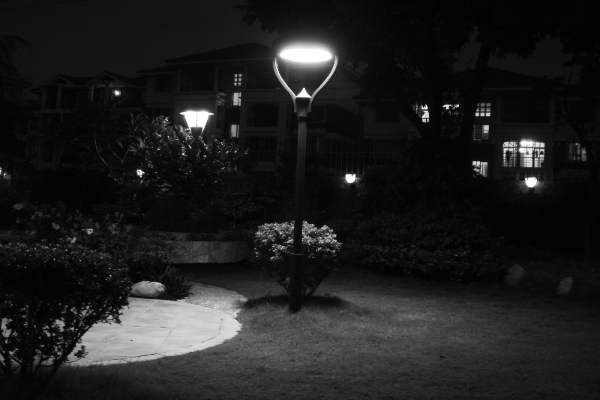

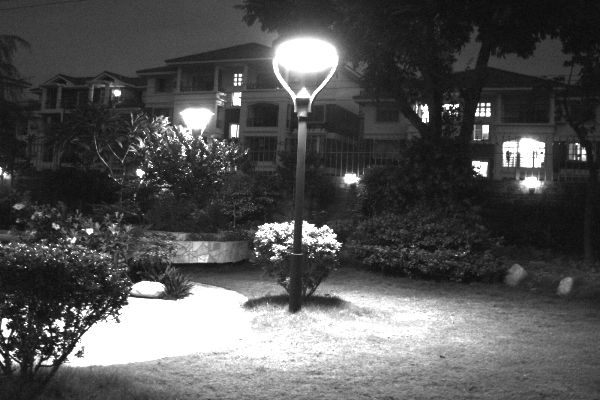

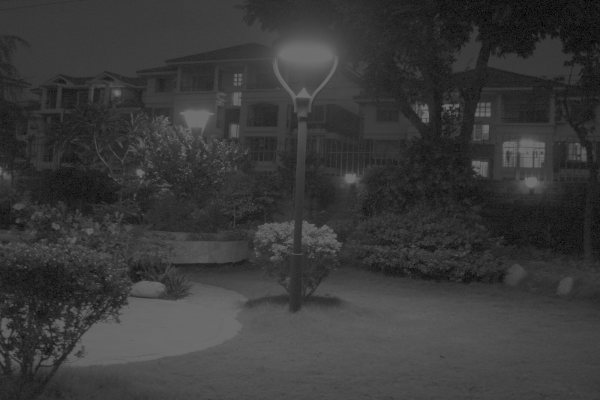

Image 2 Linear Transformation:  7.337711313089713
Image 2 Log Transformation:  16.35082576425322


In [ ]:
import math
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image2:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
x1=np.asarray(x1)
x2=np.asarray(x2)
cv2_imshow(gray_image2)
cv2_imshow(x1)
psnr1=calculate_psnr(gray_image2, x1)
psnr2=calculate_psnr(gray_image2, x2)
print("Image 2 Linear Transformation: ",psnr1)
print("Image 2 Log Transformation: ",psnr2)

In [ ]:
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image2:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
x1=np.asarray(x1)
x2=np.asarray(x2)
cv2_imshow(gray_image2)
cv2_imshow(x1)
cv2_imshow(x2)
psnr1=calculate_psnr(gray_image2, x1)
psnr2=calculate_psnr(gray_image2, x2)
print("Image 2 Linear Transformation: ",psnr1)
print("Image 2 Log Transformation: ",psnr2)

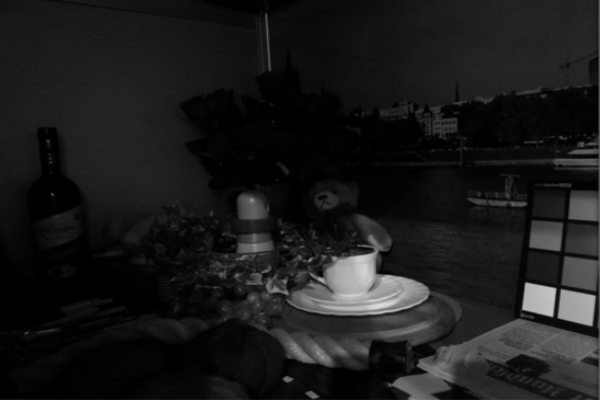

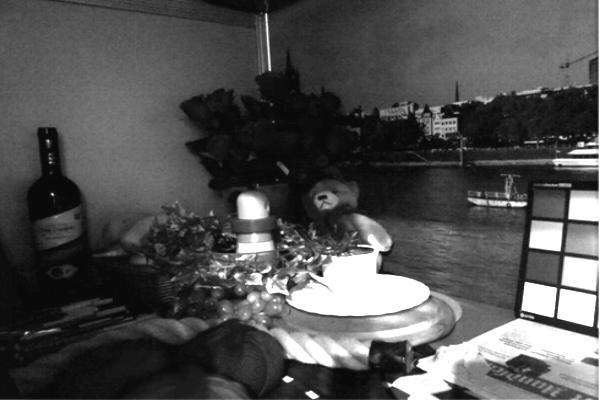

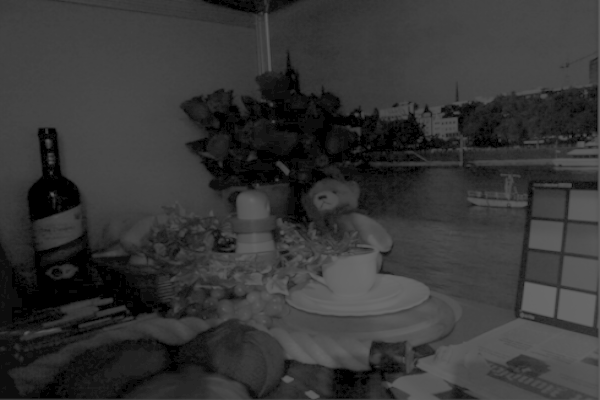

In [ ]:
import math
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image1:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
y1=np.asarray(x1)
y2=np.asarray(x2)
cv2_imshow(gray_image1)
cv2_imshow(y1)
cv2_imshow(y2)

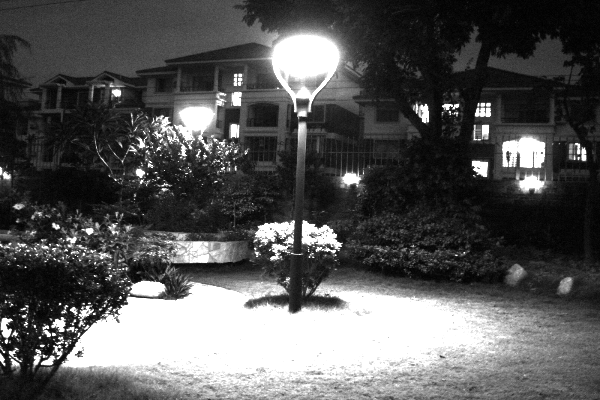

Image 2 Power law Transformation:  1.06558431270742


In [ ]:
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image2:
  for j in i:
    p=2*(j**1.2)
    y1.append(p)
    
  x1.append(y1)
  y1=[]

x1=np.asarray(x1)
cv2_imshow(x1)
psnr1=calculate_psnr(gray_image2, x1)
print("Image 2 Power law Transformation: ",psnr1)

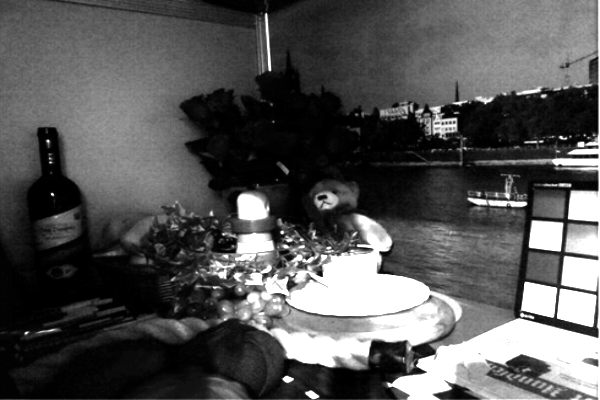

Image 2 Power law Transformation:  3.7307946295859344


In [ ]:
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image1:
  for j in i:
    p=2*(j**1.2)
    y1.append(p)
    
  x1.append(y1)
  y1=[]

x1=np.asarray(x1)
cv2_imshow(x1)
psnr1=calculate_psnr(gray_image1, x1)
print("Image 2 Power law Transformation: ",psnr1)

In [ ]:
#MSRCP

In [ ]:
def singleScaleRetinex(img, sigma):

    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))

    return retinex

def multiScaleRetinex(img, sigma_list):

    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += singleScaleRetinex(img, sigma)

    retinex = retinex / len(sigma_list)

    return retinex

def colorRestoration(img, alpha, beta):

    img_sum = np.sum(img, axis=2, keepdims=True)

    color_restoration = beta * (np.log10(alpha * img) - np.log10(img_sum))

    return color_restoration

def simplestColorBalance(img, low_clip, high_clip):    

    total = img.shape[0] * img.shape[1]
    for i in range(img.shape[2]):
        unique, counts = np.unique(img[:, :, i], return_counts=True)
        current = 0
        for u, c in zip(unique, counts):            
            if float(current) / total < low_clip:
                low_val = u
            if float(current) / total < high_clip:
                high_val = u
            current += c
                
        img[:, :, i] = np.maximum(np.minimum(img[:, :, i], high_val), low_val)

    return img

def MSRCP(img, sigma_list, low_clip, high_clip):

    img = np.float64(img) + 1.0

    intensity = np.sum(img, axis=2) / img.shape[2]    

    retinex = multiScaleRetinex(intensity, sigma_list)

    intensity = np.expand_dims(intensity, 2)
    retinex = np.expand_dims(retinex, 2)

    intensity1 = simplestColorBalance(retinex, low_clip, high_clip)

    intensity1 = (intensity1 - np.min(intensity1)) / \
                 (np.max(intensity1) - np.min(intensity1)) * \
                 255.0 + 1.0

    img_msrcp = np.zeros_like(img)
    
    for y in range(img_msrcp.shape[0]):
        for x in range(img_msrcp.shape[1]):
            B = np.max(img[y, x])
            A = np.minimum(256.0 / B, intensity1[y, x, 0] / intensity[y, x, 0])
            img_msrcp[y, x, 0] = A * img[y, x, 0]
            img_msrcp[y, x, 1] = A * img[y, x, 1]
            img_msrcp[y, x, 2] = A * img[y, x, 2]

    img_msrcp = np.uint8(img_msrcp - 1.0)
    return img_msrcp


'''{
  "sigma_list": [15, 80, 250],
  "G"         : 5.0,
  "b"         : 25.0,
  "alpha"     : 125.0,
  "beta"      : 46.0,
  "low_clip"  : 0.01,
  "high_clip" : 0.99
}'''


'{\n  "sigma_list": [15, 80, 250],\n  "G"         : 5.0,\n  "b"         : 25.0,\n  "alpha"     : 125.0,\n  "beta"      : 46.0,\n  "low_clip"  : 0.01,\n  "high_clip" : 0.99\n}'

In [ ]:
sigma_list=[15,80,250]
low_clip=0.01
high_clip=0.99

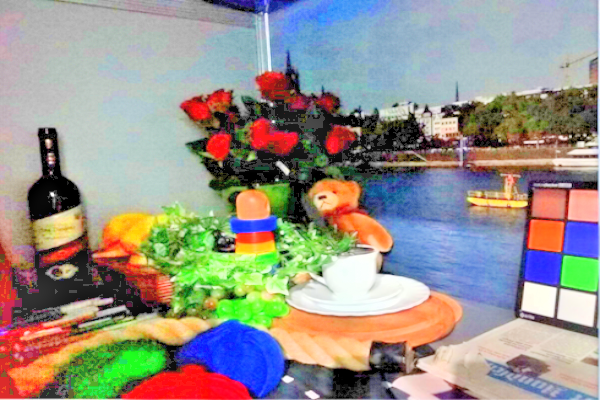

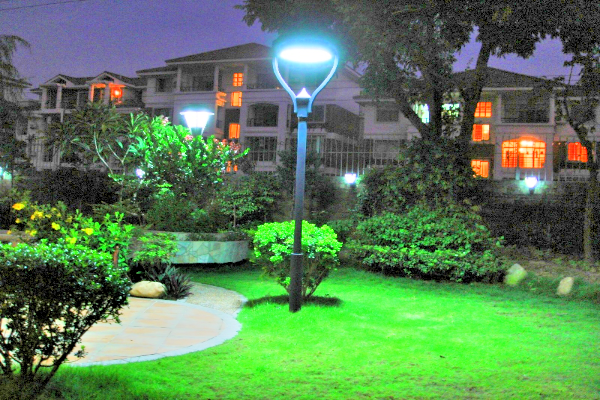

Image 2 Linear Transformation:  5.716272516199805
Image 2 Linear Transformation:  9.614683638521377


In [ ]:
msrcpimg1=MSRCP(image1, sigma_list, low_clip, high_clip)
msrcpimg2=MSRCP(image2, sigma_list, low_clip, high_clip)
cv2_imshow(msrcpimg1)
cv2_imshow(msrcpimg2)
psnr1=cv2.PSNR(image1, msrcpimg1)
print("Image 2 Linear Transformation: ",psnr1)
psnr2=cv2.PSNR(image2, msrcpimg2)
print("Image 2 Linear Transformation: ",psnr2)

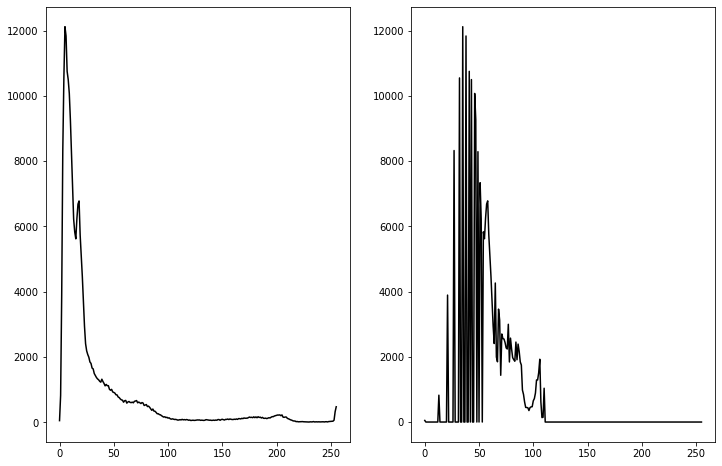

In [ ]:
#LOG
import matplotlib.pyplot as plt
import numpy as np
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

histogram1=cv2.calcHist([gray_image2], [0], None, [256], [0, 256])

import math
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image2:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
x1=np.asarray(x1)
x2=np.asarray(x2)
x1=np.float32(x1)
x2=np.float32(x2)
histogram2=cv2.calcHist([x2], [0], None, [256], [0, 256])

ax1.plot(histogram1, color='k')
ax2.plot(histogram2, color='k')

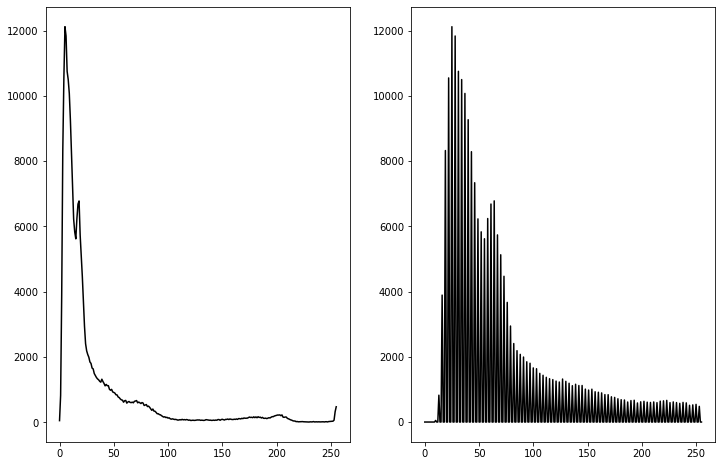

In [ ]:
#LINEAR
import matplotlib.pyplot as plt
import numpy as np
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

import math
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image2:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
x1=np.asarray(x1)
x2=np.asarray(x2)
x1=np.float32(x1)
x2=np.float32(x2)
histogram2=cv2.calcHist([x1], [0], None, [256], [0, 256])

ax1.plot(histogram1, color='k')
ax2.plot(histogram2, color='k')

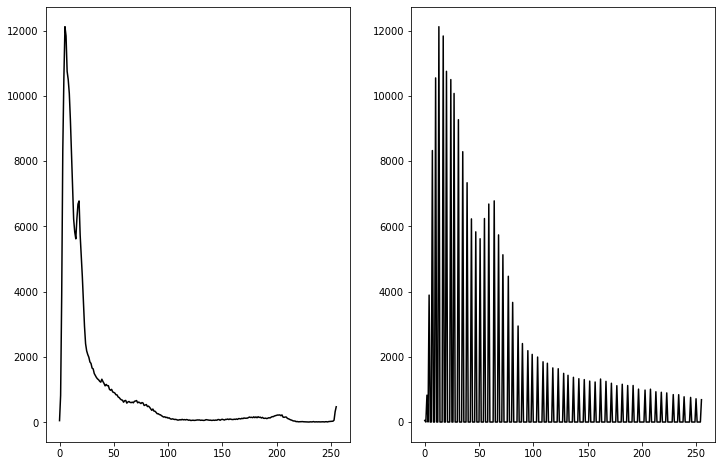

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

histogram1=cv2.calcHist([gray_image2], [0], None, [256], [0, 256])
import math
x1=[]
y1=[]
for i in gray_image2:
  for j in i:
    p=2*(j**1.2)
    y1.append(p)
  x1.append(y1)
  y1=[]

y1=np.asarray(x1)
y1=np.float32(y1)

histogram2=cv2.calcHist([y1], [0], None, [256], [0, 256])

ax1.plot(histogram1, color='k')
ax2.plot(histogram2, color='k')

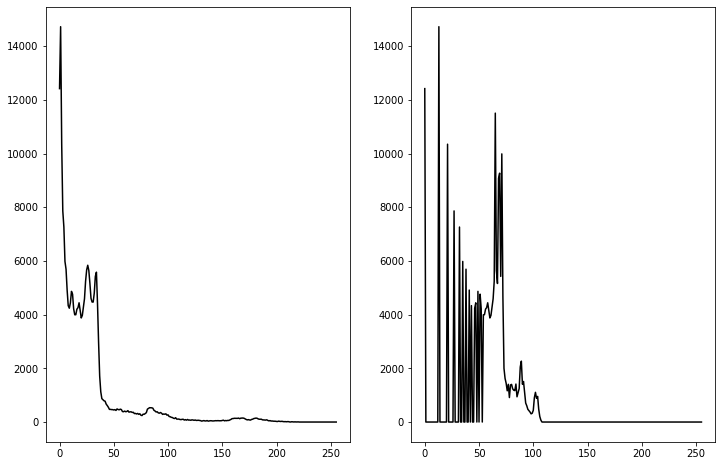

In [ ]:
#LOG
import matplotlib.pyplot as plt
import numpy as np
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

histogram1=cv2.calcHist([gray_image1], [0], None, [256], [0, 256])

import math
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image1:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
x1=np.asarray(x1)
x2=np.asarray(x2)
x1=np.float32(x1)
x2=np.float32(x2)
histogram2=cv2.calcHist([x2], [0], None, [256], [0, 256])

ax1.plot(histogram1, color='k')
ax2.plot(histogram2, color='k')

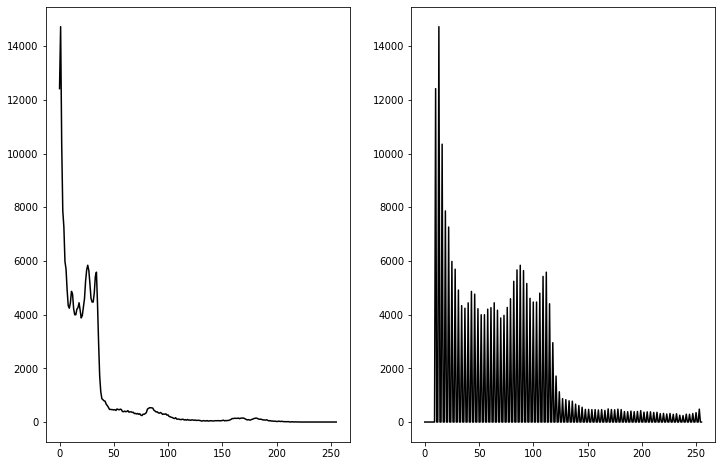

In [ ]:
#LOG
import matplotlib.pyplot as plt
import numpy as np
gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

histogram1=cv2.calcHist([gray_image1], [0], None, [256], [0, 256])

import math
x1=[]
x2=[]
y1=[]
y2=[]
for i in gray_image1:
  for j in i:
    p=j*3+10
    q=20*math.log(j+1)
    y1.append(p)
    y2.append(q)
  x1.append(y1)
  y1=[]
  x2.append(y2)
  y2=[]
x1=np.asarray(x1)
x2=np.asarray(x2)
x1=np.float32(x1)
x2=np.float32(x2)
histogram2=cv2.calcHist([x1], [0], None, [256], [0, 256])

ax1.plot(histogram1, color='k')
ax2.plot(histogram2, color='k')

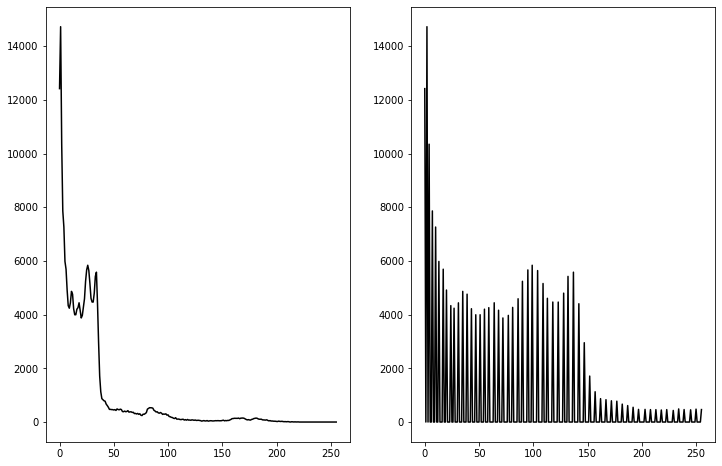

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

histogram1=cv2.calcHist([gray_image1], [0], None, [256], [0, 256])
import math
x1=[]
y1=[]
for i in gray_image1:
  for j in i:
    p=2*(j**1.2)
    y1.append(p)
  x1.append(y1)
  y1=[]

y1=np.asarray(x1)
y1=np.float32(y1)

histogram2=cv2.calcHist([y1], [0], None, [256], [0, 256])

ax1.plot(histogram1, color='k')
ax2.plot(histogram2, color='k')